## Student's Grade Prediction

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
## Importing dataset
df=pd.read_csv('student_info.csv')

In [65]:
df.head(5)

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [66]:
df.shape

(200, 2)

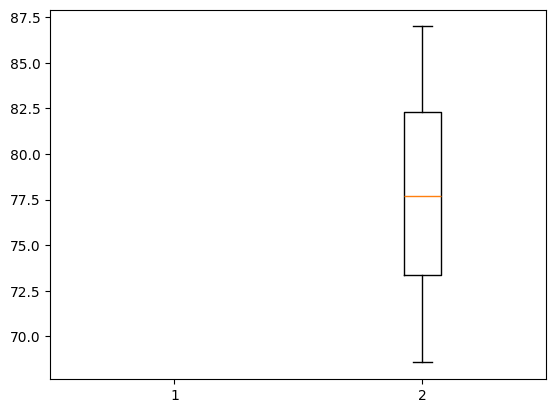

In [67]:
plt.boxplot(df)
plt.show() ## No outliers found

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [69]:
df.study_hours.isnull().sum()

5

In [70]:
df.student_marks.isnull().sum()

0

In [71]:
df[df['study_hours'].isnull()]

,study_hours,student_marks
2,NaN,78.68
31,NaN,76.14
96,NaN,75.39
122,NaN,76.83
188,NaN,77.27


In [72]:
## Total number of students who scored between 75-80 marks
df[(df['student_marks']>=75)&(df['student_marks']<=80)]

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
6,6.67,76.99
9,6.75,77.82
...,...,...
185,8.05,79.63
188,NaN,77.27
189,7.26,79.87
193,7.55,79.64


In [73]:
## Calculating mean
mean=df['study_hours'].mean()

In [74]:
df['study_hours']=df['study_hours'].fillna(mean)

In [75]:
df.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [76]:
df.head()

,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,6.995949,78.68
3,5.670000,71.82
4,8.670000,84.19


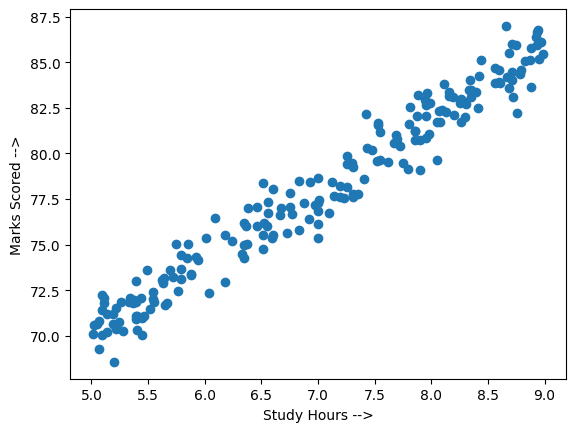

In [77]:
## Scatter plot 
plt.scatter(df['study_hours'],df['student_marks'])
plt.xlabel('Study Hours -->')
plt.ylabel('Marks Scored -->')
plt.show()  ## We will see a positive correlation

In [78]:
## Dividing dataset into Dependent and Independent varibale
X=df[['study_hours']]
y=df['student_marks']

In [79]:
X

,study_hours
0,6.830000
1,6.560000
2,6.995949
3,5.670000
4,8.670000
...,...
195,7.530000
196,8.560000
197,8.940000
198,6.600000


In [80]:
## Dividing into Train and Test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [81]:
X_train.shape,X_test.shape

((150, 1), (50, 1))

In [82]:
## Scaling the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [83]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train_scaled,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


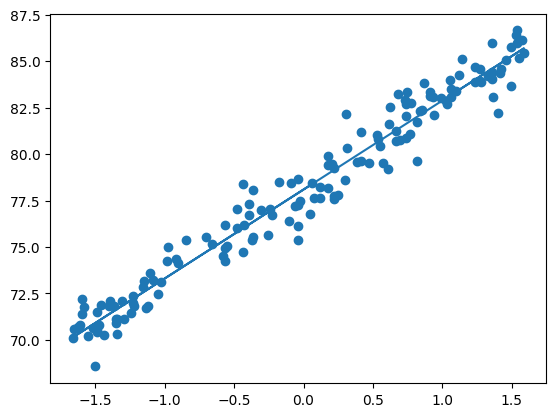

In [84]:
plt.scatter(X_train_scaled,y_train)
plt.plot(X_train_scaled,regressor.predict(X_train_scaled))

In [85]:
y_pred=regressor.predict(X_test_scaled)

In [86]:
## Performance Metrics
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print('Mean Squared Error: ',mean_squared_error(y_test,y_pred))
print('Mean Absolute Error: ',mean_absolute_error(y_test,y_pred))
print('R2 Score: ',r2_score(y_test,y_pred))

Mean Squared Error:  1.3000957295681133
Mean Absolute Error:  0.9184401509993825
R2 Score:  0.9472911066366618


### Ridge CV

In [87]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)
y_pred1=ridgecv.predict(X_test_scaled)
print('Mean Squared Error: ',mean_squared_error(y_test,y_pred1))
print('Mean Absolute Error: ',mean_absolute_error(y_test,y_pred1))
print('R2 Score: ',r2_score(y_test,y_pred1))

Mean Squared Error:  1.29771492494545
Mean Absolute Error:  0.9145671256351525
R2 Score:  0.9473876299726908


### Lasso CV

In [88]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV() ## By default cv=5
lassocv.fit(X_train_scaled,y_train)
y_pred2=lassocv.predict(X_test_scaled)
print('Mean Squared Error: ',mean_squared_error(y_test,y_pred2))
print('Mean Absolute Error: ',mean_absolute_error(y_test,y_pred2))
print('R2 Score: ',r2_score(y_test,y_pred2))

Mean Squared Error:  1.297407140925425
Mean Absolute Error:  0.9135337350755015
R2 Score:  0.9474001082500372


### ElasticNet CV

In [89]:
from sklearn.linear_model import ElasticNetCV
elasticnetcv=ElasticNetCV(cv=5) 
elasticnetcv.fit(X_train_scaled,y_train)
y_pred3=elasticnetcv.predict(X_test_scaled)
print('Mean Squared Error: ',mean_squared_error(y_test,y_pred3))
print('Mean Absolute Error: ',mean_absolute_error(y_test,y_pred3))
print('R2 Score: ',r2_score(y_test,y_pred3))

Mean Squared Error:  1.2973527091153914
Mean Absolute Error:  0.9132684326516943
R2 Score:  0.9474023150417413


### Pickling

In [90]:
scaler

,copy,True
,with_mean,True
,with_std,True


In [91]:
elasticnetcv

,l1_ratio,0.5
,eps,0.001
,n_alphas,'deprecated'
,alphas,'warn'
,fit_intercept,True
,precompute,'auto'
,max_iter,1000
,tol,0.0001
,cv,5
,copy_X,True
,verbose,0


In [93]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(elasticnetcv,open('elasticnet.pkl','wb'))

In [103]:
value = [[5.2]]              # 2D array
scaled = scaler.transform(value)
prediction = elasticnetcv.predict(scaled)
print(prediction)

[70.95285106]


a:\DataScience\CODE\venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
